In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Download MNIST
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target

# Normalize pixel values
X = X / 255.0

# Take a 10% random sample
_, X_sample, _, y_sample = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


In [10]:
def bootstrap_knn_accuracy(X, y, k_values, bootstrap_iters):
    results = {}

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracies = []

        for _ in range(bootstrap_iters):
            # Resample with replacement
            indices = np.random.choice(len(X), len(X), replace=True)
            X_train, y_train = X[indices], y[indices]

            # Out-of-bag samples
            mask = np.ones(len(X), dtype=bool)
            mask[indices] = False
            X_oob, y_oob = X[mask], y[mask]

            # Train and evaluate KNN
            knn.fit(X_train, y_train)
            accuracy = knn.score(X_oob, y_oob)
            accuracies.append(accuracy)

        results[k] = np.mean(accuracies)

    return results


In [31]:
# Define parameters
k_values = list(range(1, 11))
bootstrap_iters_list = [1, 2, 11] # for >11 computing is really long

# Store results for each bootstrap iteration count
results_per_iteration = {}

for iters in bootstrap_iters_list:
    results = bootstrap_knn_accuracy(X_sample.to_numpy(), y_sample.to_numpy(), k_values, iters)
    results_per_iteration[iters] = results


In [32]:
# calculate mean accuracy per k value
k_results = {}

for iters, results in results_per_iteration.items():
    for k, accuracy in results.items():
        if k in k_results:
            k_results[k] += accuracy
        else:
            k_results[k] = accuracy

for k in k_values:
  k_results[k] /= len(bootstrap_iters_list)

k_results

{1: 0.9293178890256258,
 2: 0.919925478665176,
 3: 0.9204130519178495,
 4: 0.9194934988484317,
 5: 0.9230271779189198,
 6: 0.9171071529883633,
 7: 0.9163055652537101,
 8: 0.9194720712137748,
 9: 0.9190994746223736,
 10: 0.9190407380743105}

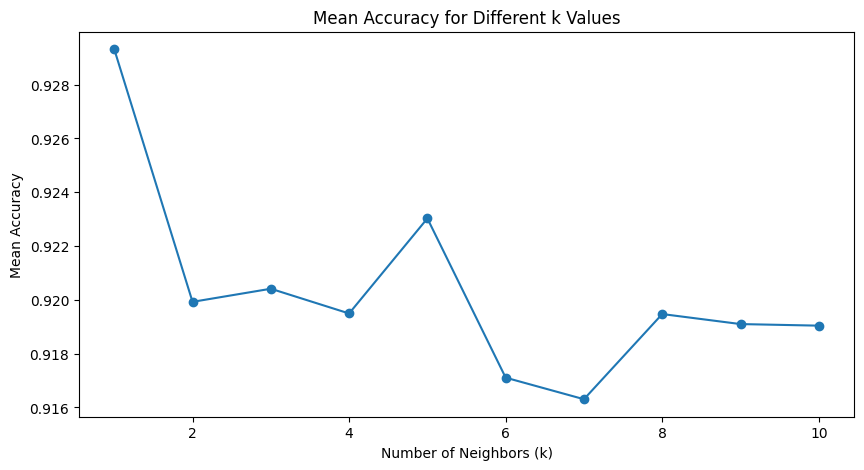

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(k_results.keys(), k_results.values(), marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy for Different k Values")
plt.show()


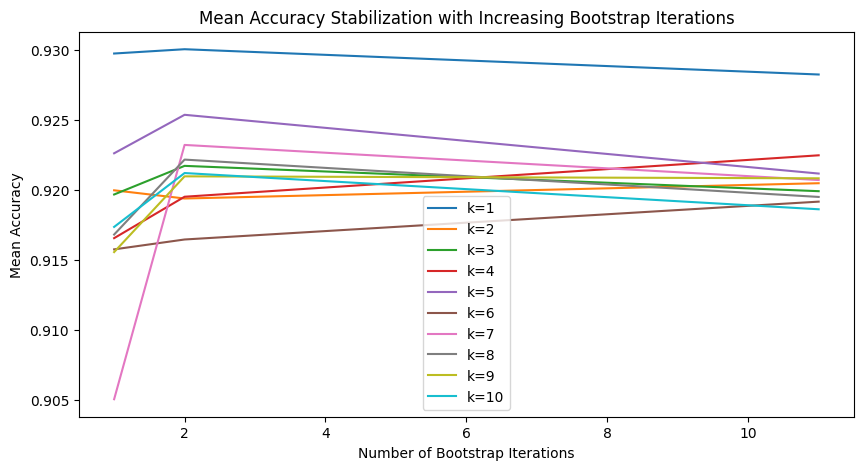

In [34]:
plt.figure(figsize=(10, 5))

for k in k_values:
    accuracies = [results[k] for results in results_per_iteration.values()]
    plt.plot(bootstrap_iters_list, accuracies, label=f'k={k}')

plt.xlabel("Number of Bootstrap Iterations")
plt.ylabel("Mean Accuracy")
plt.title("Mean Accuracy Stabilization with Increasing Bootstrap Iterations")
plt.legend()
plt.show()
